In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [25]:
DIC = [2000,2000,2000,2000,2000,2000,2000,2000,2000]
TA = [2500,2500,2500,2500,2500,2500,2500,2500,2500]
S = [30,30,30,30,30,30,30,30,30]
T = [0,5,10,15,20,25,30,35,40]
results = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S,
                    grads_of=["HCO3", 'k_carbonic_1', 'k_carbonic_2', 'CO3', 'CO2', 'Hfree', 'k_CO2'],
                    grads_wrt=['temperature'])

In [26]:
kCO2 = results['k_CO2']
k1 = results['k_carbonic_1']
k2 = results['k_carbonic_2']
kw = results['k_water']
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']
pH = results['pH']

Text(0.5, 1.0, 'DIC')

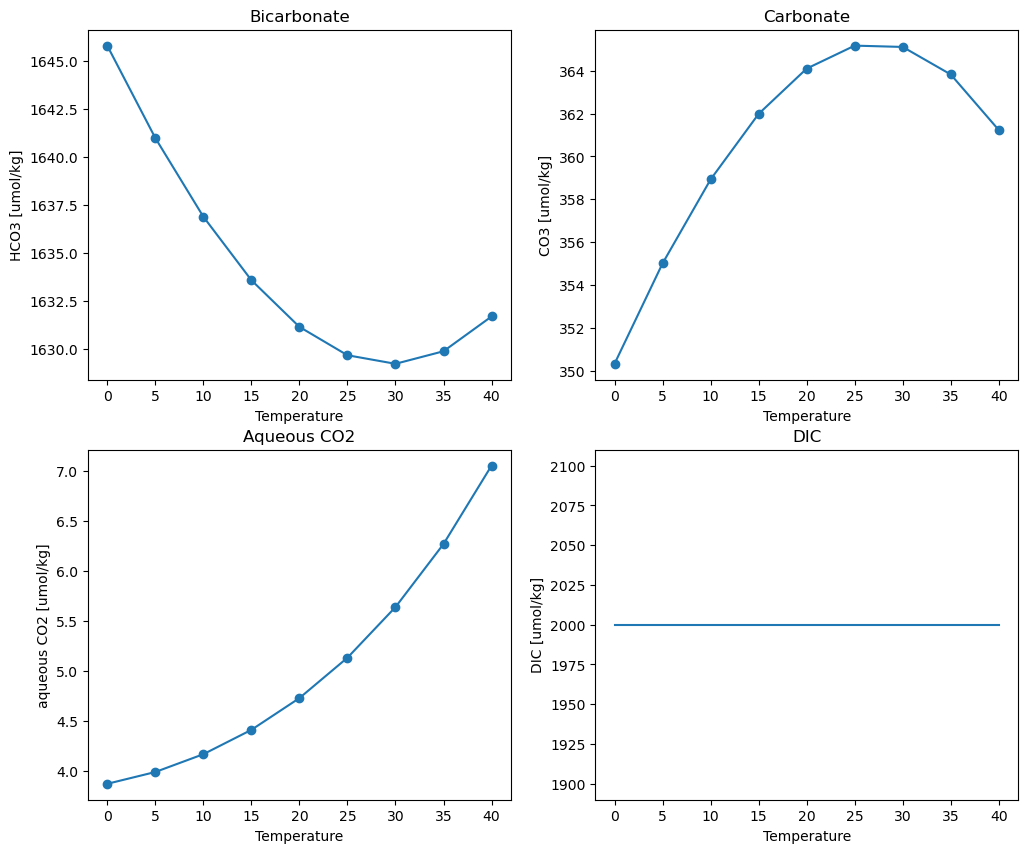

In [4]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, HCO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('HCO3 [umol/kg]')
ax.set_title('Bicarbonate')
ax = axarr[1]
ax.plot(T, CO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('CO3 [umol/kg]')
ax.set_title('Carbonate')
ax = axarr[2]
ax.plot(T, CO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('aqueous CO2 [umol/kg]')
ax.set_title('Aqueous CO2')
ax = axarr[3]
ax.plot(T, HCO3 + CO3 + CO2)
# ax.plot(T, Hfree*1000, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('DIC [umol/kg]')
ax.set_title('DIC')

Text(0.5, 1.0, 'K1/k2')

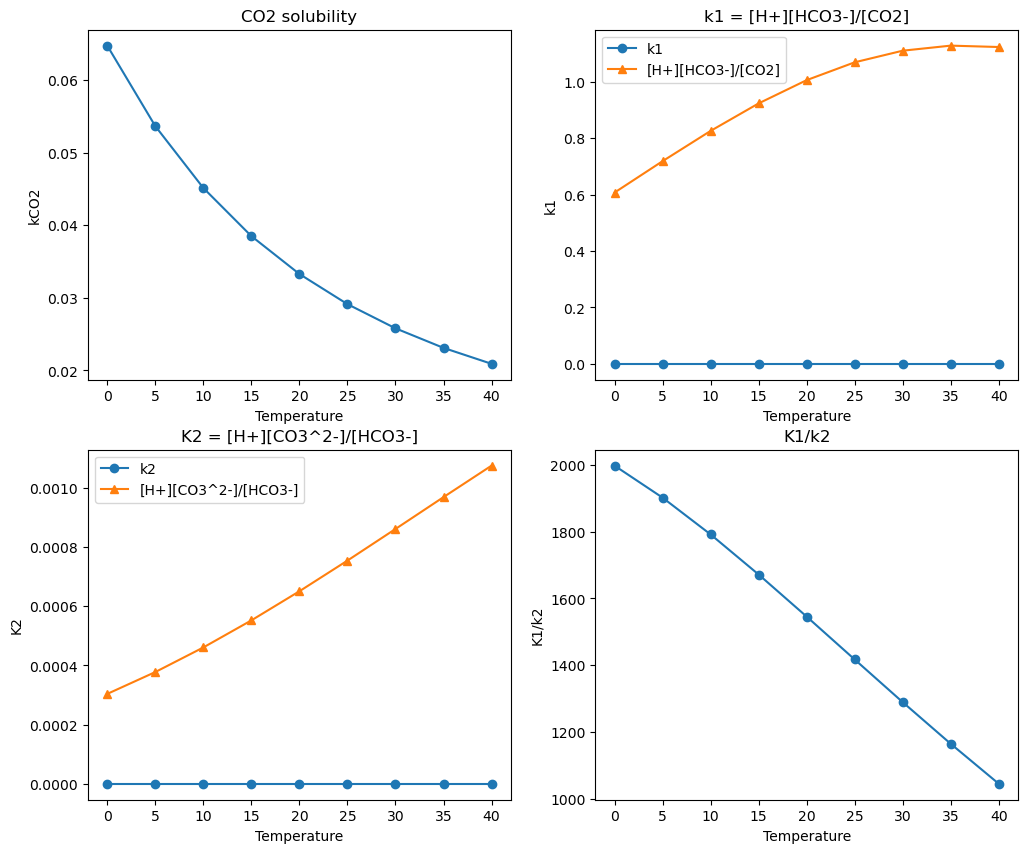

In [6]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, kCO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('kCO2')
ax.set_title('CO2 solubility')
ax = axarr[1]
ax.plot(T, k1, marker = 'o', label = 'k1')
ax.plot(T, (Hfree*bicarb)/co2aq, marker = '^', label = '[H+][HCO3-]/[CO2]')
ax.set_xlabel('Temperature')
ax.set_ylabel('k1')
ax.set_title('k1 = [H+][HCO3-]/[CO2]')
ax.legend()
ax = axarr[2]
ax.plot(T, k2, marker = 'o', label = 'k2')
ax.plot(T, (Hfree*carb)/bicarb, marker = '^', label = '[H+][CO3^2-]/[HCO3-]')
ax.set_xlabel('Temperature')
ax.set_ylabel('K2')
ax.set_title('K2 = [H+][CO3^2-]/[HCO3-]')
ax.legend()
ax = axarr[3]
ax.plot(T, k1/k2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('K1/k2')
ax.set_title('K1/k2')

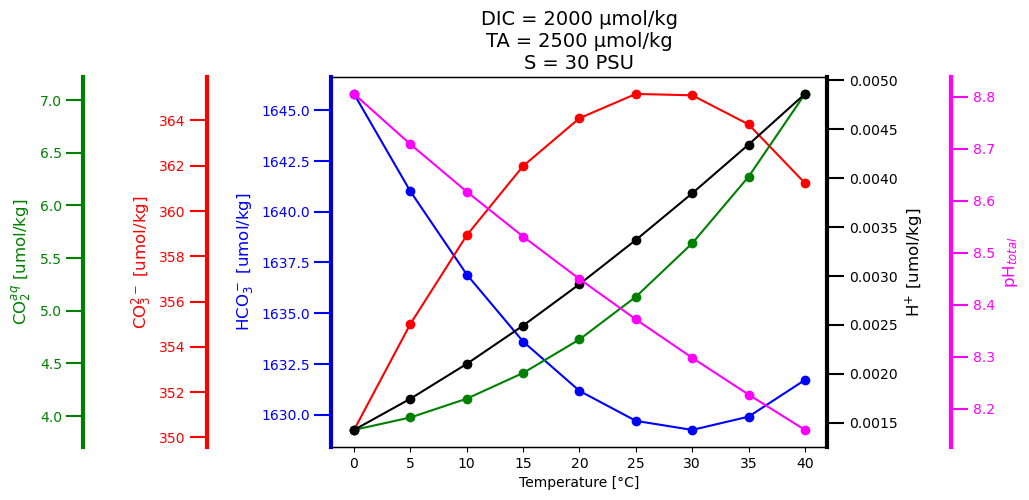

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# CO3
ax2.plot(T, CO3, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('CO$_3^{2-}$ [umol/kg]', color = 'red', fontsize = 12)

# CO2 aqueous
ax3.plot(T, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# H+
ax4.plot(T, Hfree, marker = 'o', c = 'k')
p4 = ax4.set_ylabel('H$^{+}$ [umol/kg]', color = 'k', fontsize = 12)

# pH
ax5.plot(T, pH, marker = 'o', c = 'magenta')
p5 = ax5.set_ylabel('pH$_{total}$', color = 'magenta', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))
ax5.spines["right"].set_position(("axes", 1.25))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)
ax5.tick_params(axis='y', colors='magenta', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)
ax5.spines['right'].set_color('magenta')
ax5.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

# txt1 = r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$'
# txt2 = r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$'
# txt3 = r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$'
# txt = txt1 + '\n' + txt2 + '\n' + txt3
# plt.annotate(txt,
#              xy=(1.25,0.5), xycoords = 'axes fraction',
#              # xytext=(1.25, 0.1), horizontalalignment="center",
#              arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
#             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

ax1.set_title('DIC = 2000 µmol/kg\nTA = 2500 µmol/kg\nS = 30 PSU', fontsize = 14)
fig.savefig('/Users/akbaskind/Desktop/carbsystem2.png', bbox_inches='tight')

Text(0.5, 1.0, '$HCO_3^- \\rightleftharpoons H^+ + CO_3^{2-}$')

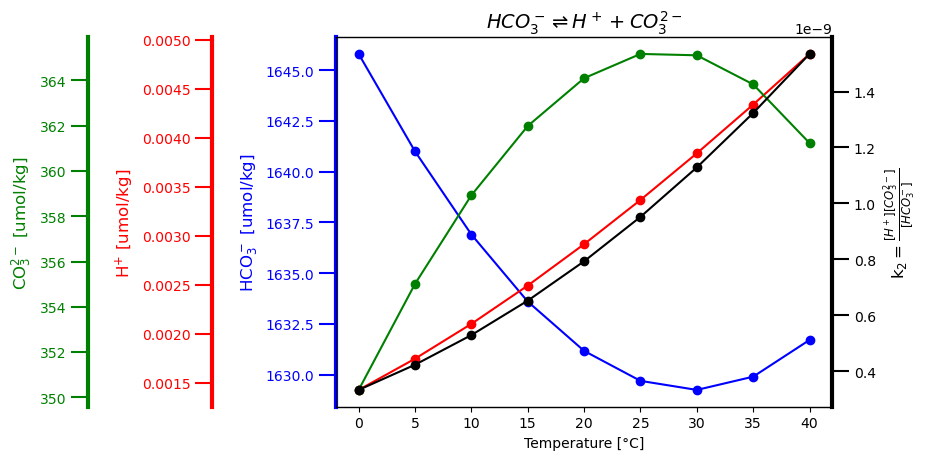

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# H+
ax2.plot(T, Hfree, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('H$^{+}$ [umol/kg]', color = 'red', fontsize = 12)

# CO3
ax3.plot(T, CO3, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_3^{2-}$ [umol/kg]', color = 'green', fontsize = 12)

# k2
ax4.plot(T, k2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$', fontsize = 14)

Text(0.5, 1.0, '$CO_2 + H_2O \\rightleftharpoons H_2CO_3^*$')

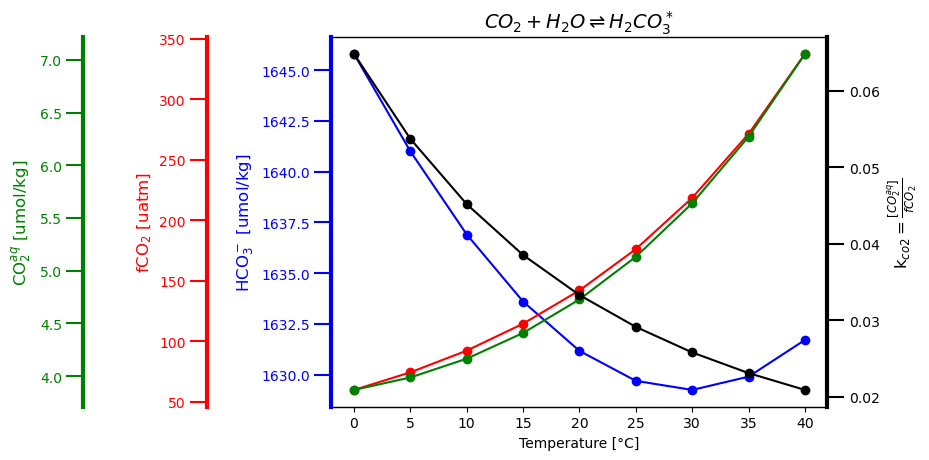

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# fCO2
ax2.plot(T, results['fCO2'], marker = 'o', c = 'red')
p2 = ax2.set_ylabel('fCO$_2$ [uatm]', color = 'red', fontsize = 12)

# CO2
ax3.plot(T, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# kCO2
ax4.plot(T, kCO2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_{co2} = \frac{[CO_2^{aq}]}{fCO_2}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$', fontsize = 14)

Text(1.25, 0.1, '$\\frac{\\partial X}{\\partial T} < 0$\nincreased T --> decreased X')

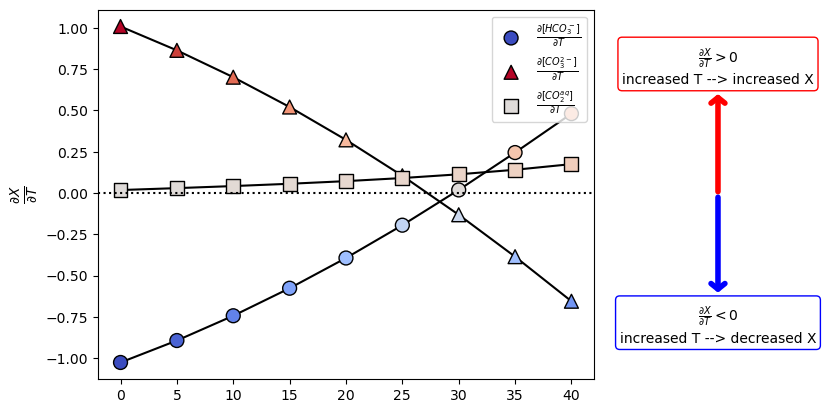

In [10]:
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

ax1.plot(T, results['d_HCO3__d_temperature'], color = 'k', zorder = 1)
ax1.plot(T, results['d_CO3__d_temperature'], color = 'k', zorder = 1)
ax1.plot(T, results['d_CO2__d_temperature'], color = 'k', zorder = 1)

ax1.scatter(T, results['d_HCO3__d_temperature'], marker = 'o', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_HCO3__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [HCO_3^-]}{\partial T}$')
ax1.scatter(T, results['d_CO3__d_temperature'], marker = '^', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_CO3__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [CO_3^{2-}]}{\partial T}$')
ax1.scatter(T, results['d_CO2__d_temperature'], marker = 's', s = 100, lw = 1, edgecolor = 'k',
            c = results['d_CO2__d_temperature'], cmap = 'coolwarm', vmin = -1, vmax = 1,
            label = r'$\frac{\partial [CO_2^{aq}]}{\partial T}$')



ax1.axhline(0, ls = 'dotted', c = 'k')
ax1.legend(loc = 'upper right')
ax1.set_ylabel(r'$\frac{\partial X}{\partial T}$', fontsize = 14)

txt = r'$\frac{\partial X}{\partial T} > 0$' + '\n' + 'increased T --> increased X'
plt.annotate(txt,
             xy=(1.25,0.5), xycoords = 'axes fraction',
             xytext=(1.25, 0.8), horizontalalignment="center",
             arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'red'), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

txt = r'$\frac{\partial X}{\partial T} < 0$' + '\n' + 'increased T --> decreased X'
plt.annotate(txt,
             xy=(1.25,0.5), xycoords = 'axes fraction',
             xytext=(1.25, 0.1), horizontalalignment="center",
             arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))


Text(0.5, 1.0, '$CO_2 + H_2O + CO_3^{2-} \\rightleftharpoons 2H_2CO_3^*$')

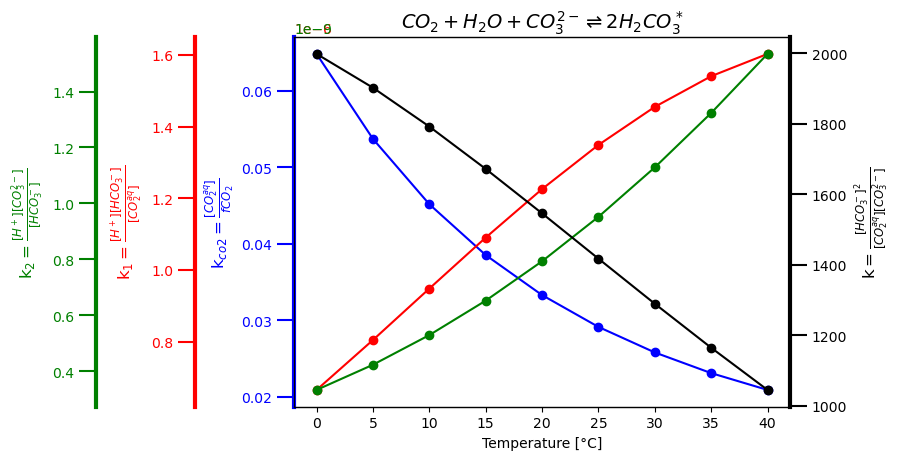

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# k0
ax1.plot(T, kCO2, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel(r'k$_{co2} = \frac{[CO_2^{aq}]}{fCO_2}$', color = 'blue', fontsize = 12)

# k1
ax2.plot(T, k1, marker = 'o', c = 'red')
p2 = ax2.set_ylabel(r'k$_1 = \frac{[H^+][HCO_3^-]}{[CO_2^{aq}]}$', color = 'red', fontsize = 12)

# CO2
ax3.plot(T, k2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel(r'k$_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$', color = 'green', fontsize = 12)

# k1/k2
ax4.plot(T, k1/k2, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$ = \frac{[HCO_3^-]^2}{[CO_2^{aq}][CO_3^{2-}]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.2))
ax3.spines["left"].set_position(("axes", -0.4))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

ax1.set_title(r'$CO_2 + H_2O + CO_3^{2-} \rightleftharpoons 2H_2CO_3^*$', fontsize = 14)

In [11]:
280*2.5

700.0

In [12]:
np.linspace(280,700,8)

array([280., 340., 400., 460., 520., 580., 640., 700.])

In [21]:
import calc_coeffs as co2

In [71]:
[t,s] = np.meshgrid(T,30)
cffs = co2.calc_coeffs(t,s)

In [72]:
results = pyco2.sys(par1 = 2500, par2 = 2000, par1_type = 1, par2_type = 2, temperature = 0, salinity = 30)
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']
co2aq

3.8697518194644176

Text(1.25, 0.45, 'Initial State @ 0°C\n$[HCO_3^-] = 1645.8\\ \\mu$mol/kg\n$[CO_3^{2-}] = 350.3\\ \\mu$mol/kg\n$[CO_2^{aq}] = 3.9\\ \\mu$mol/kg')

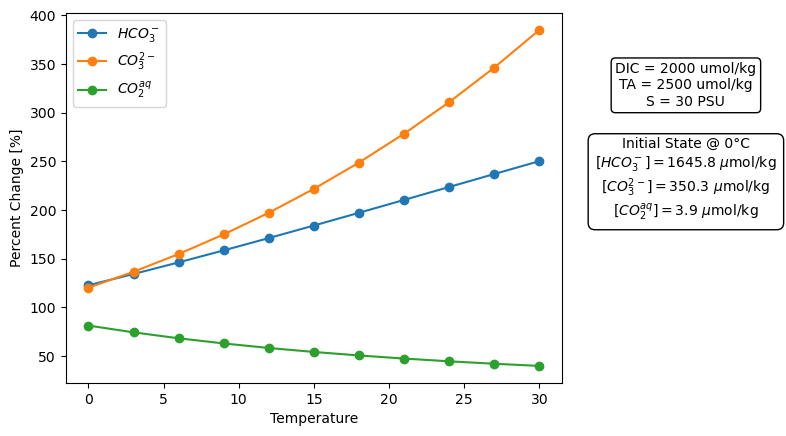

In [87]:
# k1 = [H][HCO3]/[CO2*]
# k2 = [H][CO3]/[HCO3]
hco3 = (cffs['k1'].reshape(-1,1) * 1e6) * co2aq/Hfree
co3 = (cffs['k2'].reshape(-1,1) * 1e6) * HCO3/Hfree
co2star = (Hfree * HCO3)/(cffs['k1'].reshape(-1,1) * 1e6)
plt.plot(T, 100*hco3/HCO3, marker = 'o', label = '$HCO_3^-$')
plt.plot(T, 100*co3/CO3, marker = 'o', label = '$CO_3^{2-}$')
plt.plot(T, 100*co2star/CO2, marker = 'o', label = '$CO_2^{aq}$')
plt.ylabel('Percent Change [%]')
plt.xlabel('Temperature')
plt.legend()

txt = 'DIC = 2000 umol/kg\nTA = 2500 umol/kg\nS = 30 PSU'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt,
             xy=(1.25,0.75), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

txt1 = 'Initial State @ 0°C'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt1 + '\n' + txt2 + '\n' + txt3 + '\n' + txt4,
             xy=(1.25,0.45), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

Text(1.25, 0.45, 'Initial State @ 0°C\n$[HCO_3^-] = 1645.8\\ \\mu$mol/kg\n$[CO_3^{2-}] = 350.3\\ \\mu$mol/kg\n$[CO_2^{aq}] = 3.9\\ \\mu$mol/kg')

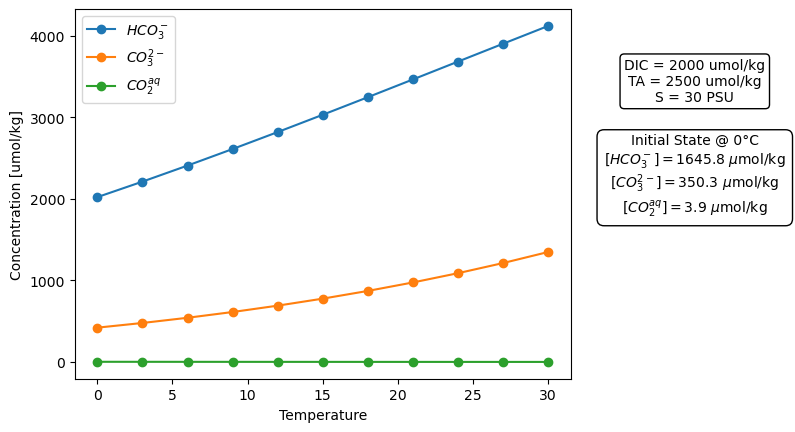

In [89]:
# k1 = [H][HCO3]/[CO2*]
# k2 = [H][CO3]/[HCO3]
hco3 = (cffs['k1'].reshape(-1,1) * 1e6) * co2aq/Hfree
co3 = (cffs['k2'].reshape(-1,1) * 1e6) * HCO3/Hfree
co2star = (Hfree * HCO3)/(cffs['k1'].reshape(-1,1) * 1e6)
plt.plot(T, hco3, marker = 'o', label = '$HCO_3^-$')
plt.plot(T, co3, marker = 'o', label = '$CO_3^{2-}$')
plt.plot(T, co2star, marker = 'o', label = '$CO_2^{aq}$')
plt.ylabel('Concentration [umol/kg]')
plt.xlabel('Temperature')
plt.legend()

txt = 'DIC = 2000 umol/kg\nTA = 2500 umol/kg\nS = 30 PSU'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt,
             xy=(1.25,0.75), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

txt1 = 'Initial State @ 0°C'
txt2 = r'$[HCO_3^-] = 1645.8\ \mu$mol/kg'
txt3 = r'$[CO_3^{2-}] = 350.3\ \mu$mol/kg'
txt4 = r'$[CO_2^{aq}] = 3.9\ \mu$mol/kg'
plt.annotate(txt1 + '\n' + txt2 + '\n' + txt3 + '\n' + txt4,
             xy=(1.25,0.45), xycoords = 'axes fraction',
            horizontalalignment="center", fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

Text(0, 0.5, 'pCO2 [µatm]')

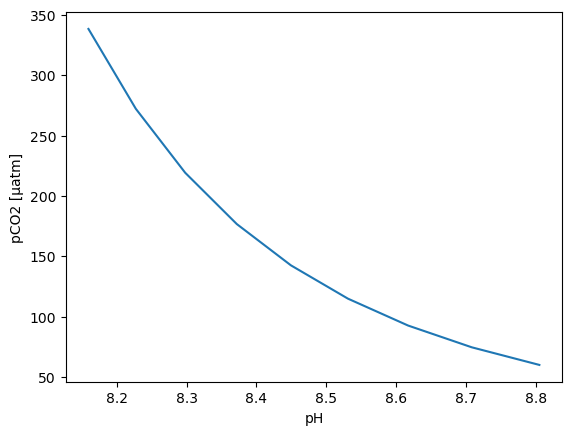

In [95]:
plt.plot(results['pH'], results['pCO2'])
plt.xlabel('pH')
plt.ylabel('pCO2 [µatm]')

In [18]:
DIC = [280., 340., 400., 460., 520., 580., 640., 700., 760]
TA = [2500,2500,2500,2500,2500,2500,2500,2500,2500]
S = [30,30,30,30,30,30,30,30,30]
T = [20,20,20,20,20,20,20,20,20]
results = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 4, temperature = T, salinity = S,
                    grads_of=["HCO3", 'k_carbonic_1', 'k_carbonic_2', 'CO3', 'CO2', 'Hfree', 'k_CO2'],
                    grads_wrt=['temperature'])

kCO2 = results['k_CO2']
k1 = results['k_carbonic_1']
k2 = results['k_carbonic_2']
kw = results['k_water']
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']
pH = results['pH']
DICout = results['dic']
pCO2 = results['pCO2']

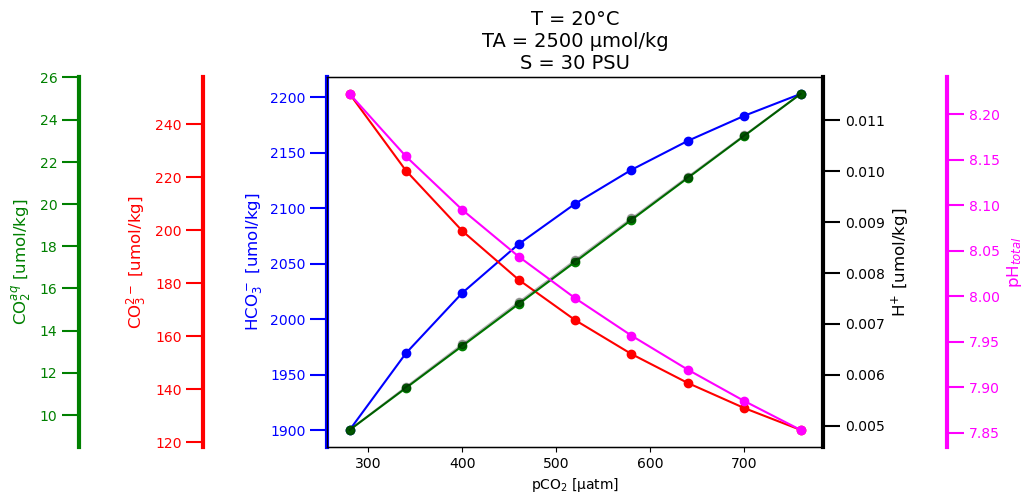

In [24]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

# Bicarbonate
ax1.plot(pCO2, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('pCO$_2$ [µatm]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# CO3
ax2.plot(pCO2, CO3, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('CO$_3^{2-}$ [umol/kg]', color = 'red', fontsize = 12)

# CO2 aqueous
ax3.plot(pCO2, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# H+
ax4.plot(pCO2, Hfree, marker = 'o', c = 'k', alpha = 0.3)
p4 = ax4.set_ylabel('H$^{+}$ [umol/kg]', color = 'k', fontsize = 12)

# pH
ax5.plot(pCO2, pH, marker = 'o', c = 'magenta')
p5 = ax5.set_ylabel('pH$_{total}$', color = 'magenta', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))
ax5.spines["right"].set_position(("axes", 1.25))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)
ax5.tick_params(axis='y', colors='magenta', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)
ax5.spines['right'].set_color('magenta')
ax5.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

# txt1 = r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$'
# txt2 = r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$'
# txt3 = r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$'
# txt = txt1 + '\n' + txt2 + '\n' + txt3
# plt.annotate(txt,
#              xy=(1.25,0.5), xycoords = 'axes fraction',
#              # xytext=(1.25, 0.1), horizontalalignment="center",
#              arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
#             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

ax1.set_title('T = 20°C\nTA = 2500 µmol/kg\nS = 30 PSU', fontsize = 14)
fig.savefig('/Users/akbaskind/Desktop/carbsystem1.png', bbox_inches='tight')

In [28]:
def o2sat(S,T):
    """
    CALCULATE OXYGEN CONCENTRATION AT SATURATION        
    adapted from o2sat.m by: Edward T Peltzer, MBARI (revised 2007 Apr 26)

    Source: The solubility of nitrogen, oxygen and argon in water and seawater - Weiss (1970) Deep Sea Research V17(4): 721-735.

    Molar volume of oxygen at STP obtained from NIST website on the thermophysical properties of fluid systems:
    http://webbook.nist.gov/chemistry/fluid/

    Inputs: 
    S = Salinity (PSU)
    T = Temperature (degC)

    Outputs:
        Oxygen saturation at one atmosphere (umol/kg)
    """
    import numpy as np
    T1 = (T + 273.15) / 100

    OSAT = -177.7888 + 255.5907 / T1 + 146.4813 * np.log(T1) - 22.2040 * T1
    OSAT = OSAT + S * (-0.037362 + T1 * (0.016504 - 0.0020564 * T1))
    OSAT = np.exp(OSAT)

    #     Convert from ml/kg to um/kg
    O2 = OSAT * 1000 / 22.392
    return O2

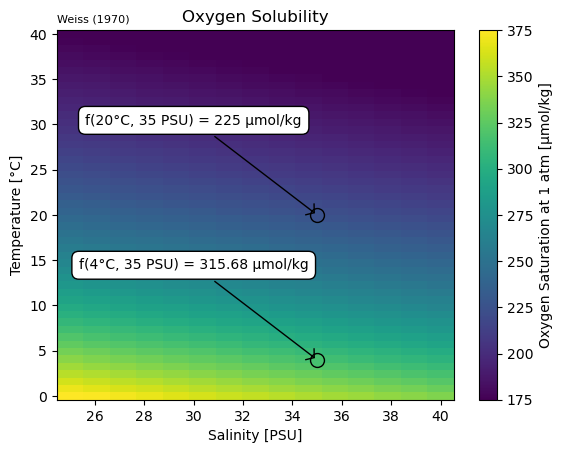

In [75]:
T = np.linspace(0,40)
S = np.linspace(25,40,15)
[t,s] = np.meshgrid(T,S)
o2 = o2sat(s,t)

fig, ax = plt.subplots()

im = ax.pcolormesh(s,t,o2, vmin = 175, vmax = 375)
cbar = plt.colorbar(im, ax = ax)
cbar.set_label('Oxygen Saturation at 1 atm [µmol/kg]')
ax.set_xlabel('Salinity [PSU]')
ax.set_ylabel('Temperature [°C]')
ax.scatter(35,20, c = 225, vmin = 175, vmax = 375,
          marker = 'o', s = 100, edgecolor = 'k')
plt.annotate('f(20°C, 35 PSU) = 225 µmol/kg',
             xy=(35,20),
             xytext=(35 - 5, 20 +10), horizontalalignment="center", xycoords = 'data',
             arrowprops=dict(arrowstyle='-> , head_width = 0.5',lw=1), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.scatter(35,4, c = 315.68, vmin = 175, vmax = 375,
          marker = 'o', s = 100, edgecolor = 'k')
plt.annotate('f(4°C, 35 PSU) = 315.68 µmol/kg',
             xy=(35,4),
             xytext=(35 - 5, 4 +10), horizontalalignment="center", xycoords = 'data',
             arrowprops=dict(arrowstyle='-> , head_width = 0.5',lw=1), fontsize = 10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Oxygen Solubility')
ax.set_title(f"Weiss (1970)", loc="left", fontsize = 8)
fig.savefig('/Users/akbaskind/Desktop/carbsystem1.png', bbox_inches='tight')

In [53]:
o2sat(35,4)

315.6800929564743